In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:\\Users\patrickogrady\Downloads\Housing.xlsx")

In [3]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [4]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Simple OLS Regression

In [5]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

<function matplotlib.pyplot.show(close=None, block=None)>

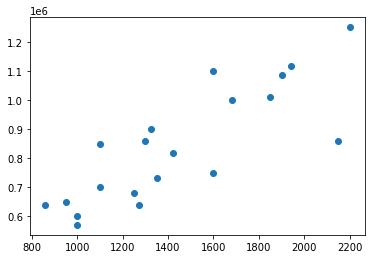

In [6]:
plt.scatter(X,Y)
plt.show

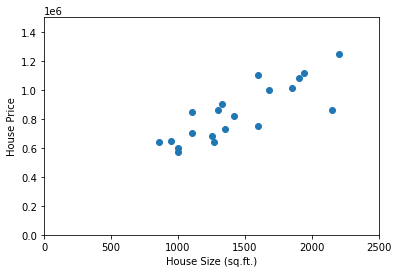

In [7]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft.)')
plt.show()

In [8]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [9]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           8.13e-06
Time:                        16:27:49   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#check the results by plugging in alpha and beta into a line equation for 1000 sq/ft house and look at the graph to ensure it makes sense
260800+401.9163*1000

662716.3

In [11]:
#note, you can obtain many of these statistics using the following
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [12]:
slope

401.91628631922595

In [13]:
intercept

260806.2360560964

In [14]:
r_value

0.8235775534696924

In [15]:
r_value ** 2

0.678279986579124

In [16]:
p_value

8.129642377231308e-06

In [17]:
std_err

65.24299510636492

#### Multivariate Regression

In [21]:
XM = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']] #double brackets to show that it is multidimensional

In [20]:
XM1 = sm.add_constant(XM)

reg = sm.OLS(Y, XM1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           6.82e-05
Time:                        16:30:40   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""